In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import os

In [2]:
from tensorflow.config.experimental import list_physical_devices
print(list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 99% 578M/586M [00:07<00:00, 95.9MB/s]
100% 586M/586M [00:07<00:00, 76.9MB/s]


In [4]:
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

## Getting Data

In [5]:
for dirpath, dirnames, filenames in os.walk('raw-img'):
    print(f"Found {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

Found 10 directories and 0 images in raw-img
Found 0 directories and 1866 images in raw-img/mucca
Found 0 directories and 1862 images in raw-img/scoiattolo
Found 0 directories and 3098 images in raw-img/gallina
Found 0 directories and 2112 images in raw-img/farfalla
Found 0 directories and 4863 images in raw-img/cane
Found 0 directories and 1668 images in raw-img/gatto
Found 0 directories and 1820 images in raw-img/pecora
Found 0 directories and 1446 images in raw-img/elefante
Found 0 directories and 2623 images in raw-img/cavallo
Found 0 directories and 4821 images in raw-img/ragno


In [6]:
animals = sorted([animal for animal in os.listdir('raw-img')])
animals

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [7]:
translate = {'cane': 'dog',
 'cavallo': 'horse',
 'elefante': 'elephant',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'scoiattolo': 'squirrel',
 'ragno': 'spider',
 'dog': 'cane',
 'elephant': 'elefante',
 'butterfly': 'farfalla',
 'chicken': 'gallina',
 'cat': 'gatto',
 'cow': 'mucca',
 'sheep': 'pecora',
 'spider': 'ragno',
 'squirrel': 'scoiattolo',
 'horse': 'cavallo'}

## View Images

In [8]:
def view_random_images():
    plt.figure(figsize=(10, 10))
    for i in range(0, 9):
        ax = plt.subplot(3, 3, i+1)
        random_number = random.randint(0, 9)
        image_path = os.path.join('raw-img', animals[random_number])
        image_path = os.path.join(image_path, random.sample(os.listdir(image_path), 1)[0])
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.title(translate[animals[random_number]] + str(image.shape))
        plt.axis('off')

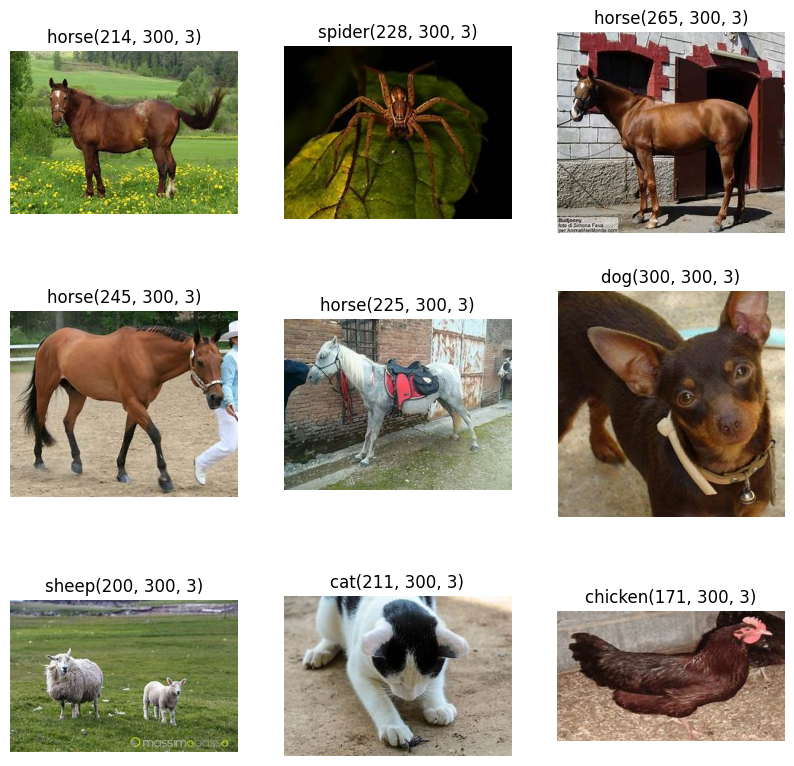

In [9]:
view_random_images()

## Load data

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

In [11]:
data = image_dataset_from_directory(directory='raw-img',
                                    labels='inferred',
                                    label_mode='categorical',
                                    class_names=animals,
                                    batch_size=32,
                                    image_size=(256,256),
                                    seed = 42)

Found 26179 files belonging to 10 classes.


In [12]:
data_iterator = data.as_numpy_iterator()
data_batch = data_iterator.next()

In [13]:
data_batch[0].shape # 32 Images

(32, 256, 256, 3)

In [14]:
data_batch[1].shape # 32 labels

(32, 10)

In [15]:
len(data) # 126179/32

819

## Preprocessing Data

### 1. Scaling

- Our 'data' is a pipeline we can scale everytime we access a batch.
- So, let's scale it while we re fetching the data itself, using a method called `map` that applies the required transformation while prefetching.


In [16]:
data = data.map(lambda x, y: (x/255., y))

In [17]:
data_iterator = data.as_numpy_iterator()
data_batch = data_iterator.next()

In [18]:
data_batch[0].min(), data_batch[0].max(), data_batch[0].shape, data_batch[1].shape

(0.0, 1.0, (32, 256, 256, 3), (32, 10))

In [19]:
data_batch[0][0]

array([[[0.6680147 , 0.57389706, 0.44056374],
        [0.6863971 , 0.59227943, 0.45894608],
        [0.69635415, 0.6022365 , 0.46890318],
        ...,
        [0.77254903, 0.7411765 , 0.6666667 ],
        [0.77254903, 0.7411765 , 0.6666667 ],
        [0.77254903, 0.7411765 , 0.6666667 ]],

       [[0.676563  , 0.5824454 , 0.44911206],
        [0.683986  , 0.58986837, 0.456535  ],
        [0.6870021 , 0.5928845 , 0.45955116],
        ...,
        [0.74315345, 0.7117809 , 0.6372711 ],
        [0.7537476 , 0.72237504, 0.6478652 ],
        [0.7655107 , 0.7341381 , 0.6596283 ]],

       [[0.68820584, 0.5940882 , 0.46075487],
        [0.6807021 , 0.58658445, 0.45325115],
        [0.6742647 , 0.5801471 , 0.44681373],
        ...,
        [0.724136  , 0.69276345, 0.61825365],
        [0.7366566 , 0.705284  , 0.6307742 ],
        [0.74842954, 0.717057  , 0.6425472 ]],

       ...,

       [[0.98543227, 0.9845199 , 0.9762187 ],
        [0.98373836, 0.9846431 , 0.9819677 ],
        [0.98396903, 0

(-0.5, 255.5, 255.5, -0.5)

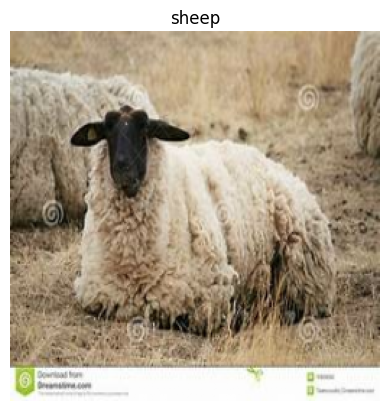

In [20]:
img = data_batch[0][0]
plt.imshow(img)
plt.title(translate[animals[data_batch[1][0].argmax()]])
plt.axis('off')

### 2. Splitting

In [21]:
total = len(data)
train_size = int(total * 0.7) + 1
val_size = int(total * 0.2) + 1
test_size = int(total * 0.1)
print(train_size, val_size, test_size, total == train_size + val_size + test_size)

574 164 81 True


In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size)
len(train), len(val), len(test)

(574, 164, 81)

## Building a baseline model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AvgPool2D, InputLayer, BatchNormalization, GlobalAvgPool2D

In [24]:
tf.random.set_seed(42)

In [25]:
model_1 = Sequential([
    InputLayer((256, 256, 3)),

    # Convulution head
    # Block-1
    Conv2D(
        filters=16,
        kernel_size=3,
        strides=1,
        activation='relu',
    ),
    MaxPool2D(2, padding='valid'),

    # Bloack-2
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(2, padding='valid'),

    # Block-3
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(2, padding='valid'),

    # Dense head
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    train,
    epochs = 5,
    steps_per_epoch = len(train),
    validation_data = val,
    validation_steps = len(val)
)

Epoch 1/5
574/574 [==============================] - 72s 111ms/step - loss: 1.8054 - accuracy: 0.3733 - val_loss: 1.3932 - val_accuracy: 0.5312
Epoch 2/5
574/574 [==============================] - 63s 109ms/step - loss: 1.2224 - accuracy: 0.5844 - val_loss: 1.2794 - val_accuracy: 0.5686
Epoch 3/5
574/574 [==============================] - 61s 107ms/step - loss: 0.8400 - accuracy: 0.7226 - val_loss: 1.3653 - val_accuracy: 0.5909
Epoch 4/5
574/574 [==============================] - 72s 125ms/step - loss: 0.4870 - accuracy: 0.8385 - val_loss: 1.5254 - val_accuracy: 0.5987
Epoch 5/5
574/574 [==============================] - 72s 126ms/step - loss: 0.2498 - accuracy: 0.9198 - val_loss: 1.7726 - val_accuracy: 0.5955


In [26]:
model_1.evaluate(test)

81/81 [==============================] - 31s 42ms/step - loss: 1.8742 - accuracy: 0.5884


[1.8742244243621826, 0.5883730053901672]

In [27]:
def plot_loss_curves(history):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    df = pd.DataFrame(history.history)
    ax[0].plot(df[['loss', 'val_loss']])
    ax[0].set_title('Loss')
    ax[0].legend(['train', 'val'])
    ax[1].plot(df[['accuracy', 'val_accuracy']])
    ax[1].set_title('Accuracy')
    ax[1].legend(['train', 'val'])

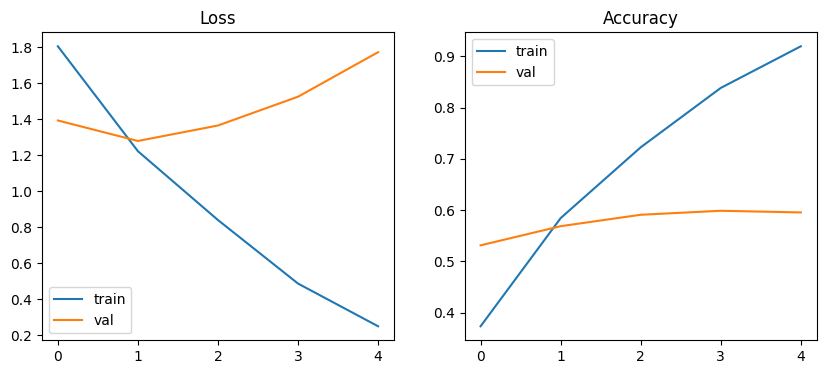

In [28]:
plot_loss_curves(history_1)

`model_1` is clearly `overfitting` too early. Let's add data augmentation.

### Data augmentation

In [29]:
from tensorflow.keras.layers import RandomFlip, RandomContrast, RandomZoom, RandomRotation

data_augmentation_layer = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
])

In [30]:
model_2 = Sequential([
    data_augmentation_layer,
    InputLayer(input_shape=(256, 256, 3)),

    # Convulutional Base
    # Block-1
    Conv2D(filters=16, kernel_size=3, activation='relu'),
    MaxPool2D(),

    # Block-2
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(),

    # Block-3
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(),

    # Dense Head
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_2 = model_2.fit(
    train,
    epochs = 5,
    steps_per_epoch = len(train),
    validation_data = val,
    validation_steps = len(val)
)

Epoch 1/5
574/574 [==============================] - 66s 106ms/step - loss: 1.8523 - accuracy: 0.3482 - val_loss: 1.6533 - val_accuracy: 0.4278
Epoch 2/5
574/574 [==============================] - 63s 110ms/step - loss: 1.5163 - accuracy: 0.4802 - val_loss: 1.2940 - val_accuracy: 0.5608
Epoch 3/5
574/574 [==============================] - 62s 108ms/step - loss: 1.3810 - accuracy: 0.5312 - val_loss: 1.2578 - val_accuracy: 0.5749
Epoch 4/5
574/574 [==============================] - 62s 107ms/step - loss: 1.2715 - accuracy: 0.5682 - val_loss: 1.1916 - val_accuracy: 0.5972
Epoch 5/5
574/574 [==============================] - 74s 128ms/step - loss: 1.1946 - accuracy: 0.5936 - val_loss: 1.2483 - val_accuracy: 0.5776


In [31]:
model_2.evaluate(test)

81/81 [==============================] - 32s 54ms/step - loss: 1.2472 - accuracy: 0.5825


[1.2472137212753296, 0.5825204849243164]

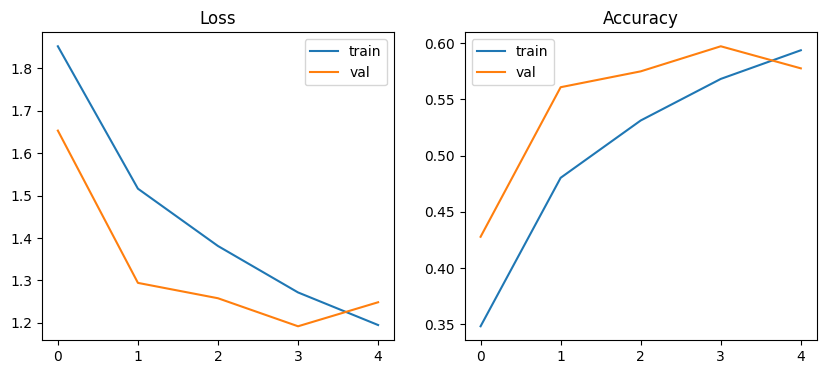

In [32]:
plot_loss_curves(history_2)

- Now, the graphs are more lively, Overfitting got delayed.
- Let's train for longer and add Dropout layers.

In [33]:
model_3 = Sequential([
    data_augmentation_layer,
    InputLayer(input_shape=(256, 256, 3)),

    # Convulutional Base
    # Block-1
    Conv2D(filters=16, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    # Block-2
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    # Block-3
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    # Dense Head
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_3 = model_3.fit(
    train,
    epochs = 10,
    steps_per_epoch = len(train),
    validation_data = val,
    validation_steps = len(val)
)

Epoch 1/10
574/574 [==============================] - 84s 141ms/step - loss: 2.2594 - accuracy: 0.2107 - val_loss: 2.0123 - val_accuracy: 0.3083
Epoch 2/10
574/574 [==============================] - 68s 118ms/step - loss: 1.9448 - accuracy: 0.3099 - val_loss: 1.7092 - val_accuracy: 0.4087
Epoch 3/10
574/574 [==============================] - 78s 136ms/step - loss: 1.8156 - accuracy: 0.3606 - val_loss: 1.6565 - val_accuracy: 0.4364
Epoch 4/10
574/574 [==============================] - 80s 139ms/step - loss: 1.7355 - accuracy: 0.3937 - val_loss: 1.6014 - val_accuracy: 0.4482
Epoch 5/10
574/574 [==============================] - 66s 114ms/step - loss: 1.6670 - accuracy: 0.4117 - val_loss: 1.4369 - val_accuracy: 0.5158
Epoch 6/10
574/574 [==============================] - 67s 117ms/step - loss: 1.6033 - accuracy: 0.4405 - val_loss: 1.4793 - val_accuracy: 0.4922
Epoch 7/10
574/574 [==============================] - 66s 115ms/step - loss: 1.5827 - accuracy: 0.4550 - val_loss: 1.3462 - val_ac

In [34]:
model_3.evaluate(test)

81/81 [==============================] - 30s 38ms/step - loss: 1.3511 - accuracy: 0.5568


[1.3510743379592896, 0.5567694306373596]

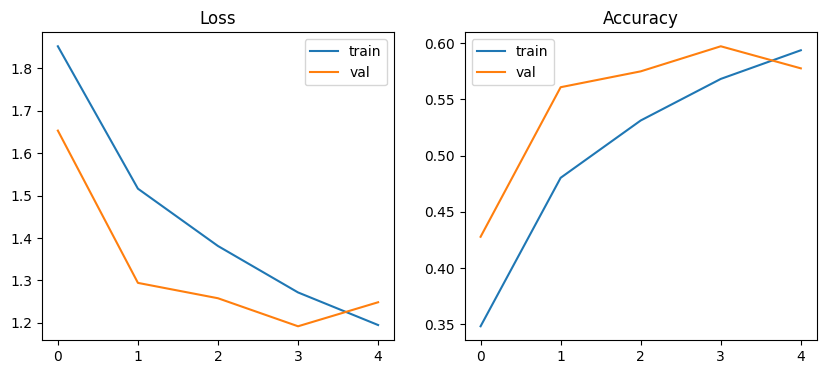

In [35]:
plot_loss_curves(history_2)

## Transfer Learning

In [44]:
Xception_model_1 = tf.keras.applications.Xception(
    include_top = False
)
Xception_model_1.trainable = False

In [48]:
model_4 = Sequential([
    data_augmentation_layer,
    Xception_model_1,

    # Dense Head
    GlobalAvgPool2D(),
    Dense(10, activation='softmax')
])

model_4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_4 = model_4.fit(
    train,
    epochs = 10,
    steps_per_epoch = len(train),
    validation_data = val,
    validation_steps = len(val)
)

Epoch 1/10
574/574 [==============================] - 154s 262ms/step - loss: 0.4432 - accuracy: 0.8718 - val_loss: 0.1263 - val_accuracy: 0.9651
Epoch 2/10
574/574 [==============================] - 151s 263ms/step - loss: 0.2812 - accuracy: 0.9112 - val_loss: 0.1180 - val_accuracy: 0.9665
Epoch 3/10
574/574 [==============================] - 151s 262ms/step - loss: 0.2565 - accuracy: 0.9158 - val_loss: 0.1097 - val_accuracy: 0.9695
Epoch 4/10
574/574 [==============================] - 150s 261ms/step - loss: 0.2479 - accuracy: 0.9190 - val_loss: 0.1086 - val_accuracy: 0.9686
Epoch 5/10
574/574 [==============================] - 149s 260ms/step - loss: 0.2346 - accuracy: 0.9247 - val_loss: 0.1064 - val_accuracy: 0.9678
Epoch 6/10
574/574 [==============================] - 150s 262ms/step - loss: 0.2341 - accuracy: 0.9250 - val_loss: 0.1069 - val_accuracy: 0.9689
Epoch 7/10
574/574 [==============================] - 180s 314ms/step - loss: 0.2241 - accuracy: 0.9254 - val_loss: 0.1071 -

In [49]:
model_4.evaluate(test)

81/81 [==============================] - 45s 153ms/step - loss: 0.1200 - accuracy: 0.9672


[0.11998248100280762, 0.9672259092330933]

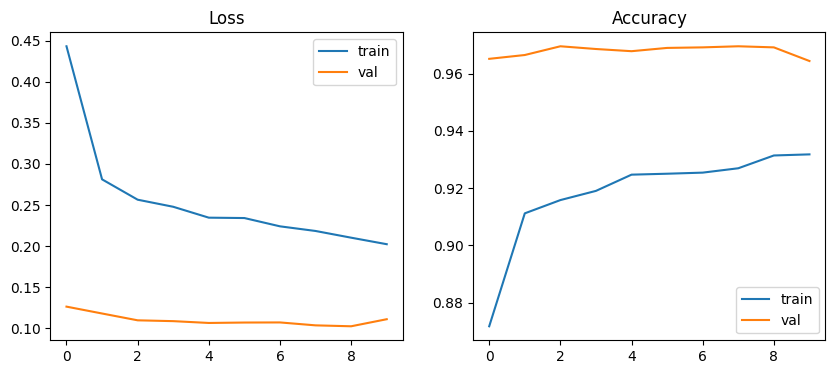

In [50]:
plot_loss_curves(history_4)

## Custom Image Prediction

In [56]:
def load_and_prep_image(filename, img_shape=256):
    """
    Reads ad img from filename.
    Turns it into a tensor and reshapes it to
    (img_shape, img_shape, color_channels)
    """
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.
    return img

In [67]:
def predict_image(model, filename):
    x = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(x, axis=0))
    return (translate[animals[pred.argmax()]])

In [111]:
def predict_image_label(model, image):
    pred = model.predict(tf.expand_dims(image, axis=0))
    return pred.argmax()

In [68]:
predict_image(model_4, '/content/butterfly.jpg')

1/1 [==============================] - 0s 27ms/step


'butterfly'

## Evaluating the model

### Confusion Matrix

In [112]:
y_true = []
y_preds = []
for images, labels in test.unbatch():
  y_preds.append(predict_image_label(model_4, images))
  y_true.append(labels.numpy().argmax())
print(y_preds[:10])
print(y_true[:10])

1/1 [==============================] - 0s 27ms/step
[4, 6, 8, 4, 1, 8, 1, 8, 1, 8]
[4, 6, 8, 4, 1, 8, 1, 8, 1, 8]


In [133]:
len(y_true), len(y_preds)

(2563, 2563)

In [114]:
translated_animals = [translate[animal] for animal in animals]

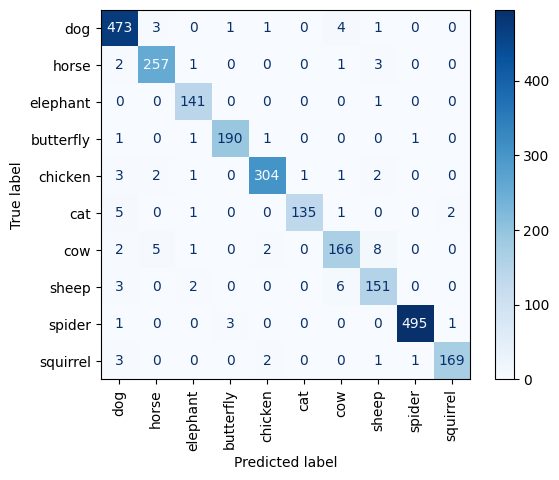

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=translated_animals)
disp.plot(cmap='Blues', xticks_rotation='vertical');

Looks like the model is confusing sheep for cow and viceversa

### Classification Report

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       483
           1       0.96      0.97      0.97       264
           2       0.95      0.99      0.97       142
           3       0.98      0.98      0.98       194
           4       0.98      0.97      0.97       314
           5       0.99      0.94      0.96       144
           6       0.93      0.90      0.91       184
           7       0.90      0.93      0.92       162
           8       1.00      0.99      0.99       500
           9       0.98      0.96      0.97       176

    accuracy                           0.97      2563
   macro avg       0.96      0.96      0.96      2563
weighted avg       0.97      0.97      0.97      2563



## Saving Model

In [54]:
model_4.save("my_model.h5", include_optimizer=True)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
